In [104]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20,
                             shear_range=10,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory('../images/',
                             shuffle=True,

                                              target_size=(28,28),
                                              subset='training')

val_generator = datagen.flow_from_directory('../images/',shuffle=True,
batch_size=311,
                                            target_size=(28,28),
                                            subset='validation')

Found 1246 images belonging to 26 classes.
Found 311 images belonging to 26 classes.


In [72]:
from tensorflow.keras import backend as K
from tensorflow.keras import layers as L
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

K.clear_session()

model_ckpt = ModelCheckpoint('Mymodel.h5',save_best_only=True)
reduce_lr = ReduceLROnPlateau(patience=8,verbose=0)
early_stop = EarlyStopping(patience=15,verbose=1)

entry = L.Input(shape=(28,28,3))
x = L.SeparableConv2D(64,(3,3),activation='relu')(entry)
x = L.MaxPooling2D((2,2))(x)
x = L.SeparableConv2D(128,(3,3),activation='relu')(x)
x = L.MaxPooling2D((2,2))(x)
x = L.SeparableConv2D(256,(2,2),activation='relu')(x)
x = L.GlobalMaxPooling2D()(x)
x = L.Dense(256)(x)
x = L.LeakyReLU()(x)
x = L.Dense(64,kernel_regularizer=l2(2e-4))(x)
x = L.LeakyReLU()(x)
x = L.Dense(26,activation='softmax')(x)

model = Model(entry,x)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              validation_data=val_generator,
                              epochs=200,
                              callbacks=[model_ckpt,reduce_lr,early_stop],
                              verbose=1)



C:\Users\prabh\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
39/39 [==============================] - 4s 83ms/step - loss: 3.4660 - accuracy: 0.0268 - val_loss: 3.2769 - val_accuracy: 0.0386
Epoch 2/200
39/39 [==============================] - 2s 52ms/step - loss: 3.2897 - accuracy: 8.1872e-05 - val_loss: 3.2761 - val_accuracy: 0.0514
Epoch 3/200
39/39 [==============================] - 3s 70ms/step - loss: 3.2837 - accuracy: 0.0434 - val_loss: 3.2750 - val_accuracy: 0.0514
Epoch 4/200
39/39 [==============================] - ETA: 0s - loss: 3.2864 - accuracy: 0.0089

KeyboardInterrupt: 

In [90]:
from tensorflow.keras.models import Model,load_model
import matplotlib.pyplot as plt
model = load_model('../Mymodel.h5')
acc = model.evaluate(val_generator)[1]
print('model accuracy: {}'.format(round(acc,4)))

10/10 [==============================] - 1s 49ms/step - loss: 0.1589 - accuracy: 0.9582
model accuracy: 0.9582


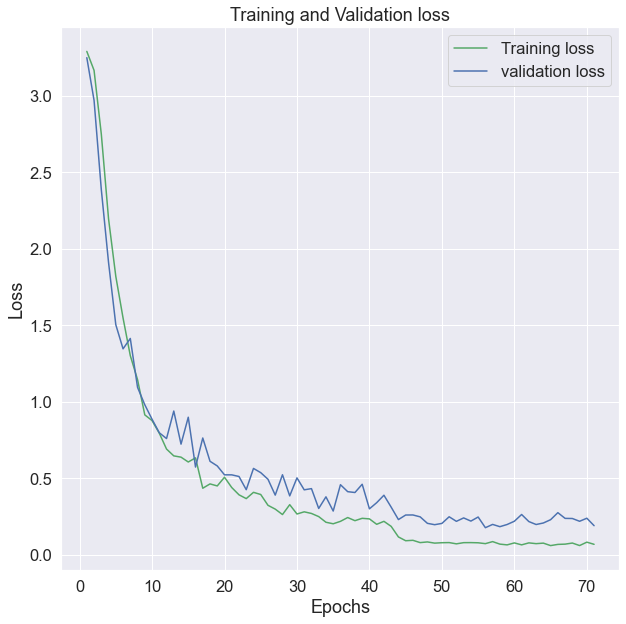

In [45]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,72)
plt.figure(figsize=(10,10))

plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('LOSS')
plt.legend()
plt.show()



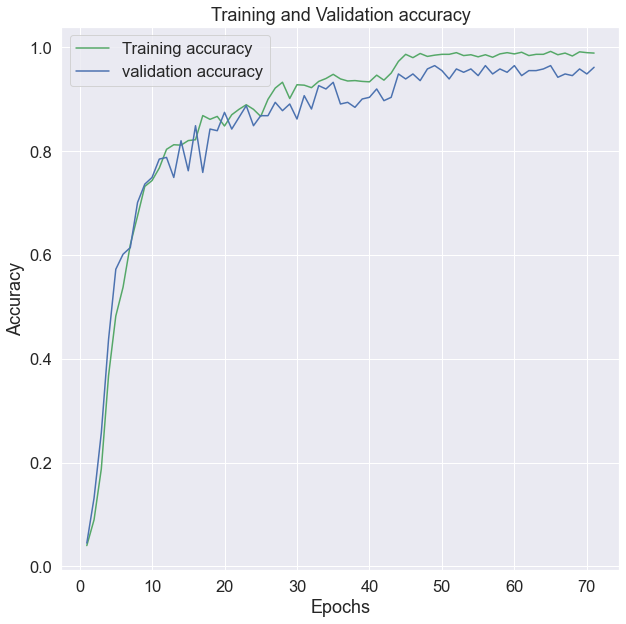

In [46]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,72)
plt.figure(figsize=(10,10))

plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('accuracy')

plt.legend()
plt.show()


In [92]:
classes2= val_generator.classes
classes2

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

In [88]:
classes = val_generator.class_indices.keys()
trueclasses = val_generator.classes
ypred = model.predict(val_generator)
ypred = np.argmax(ypred,axis = 1)


In [89]:
import numpy as np 
ypred

array([15,  3, 25,  8, 12, 10,  9, 11, 20,  4, 21, 20, 22, 23, 18,  2,  8,
        4,  8,  9,  7, 18,  3,  4,  1, 14, 14, 20, 10, 11, 16,  0,  2, 23,
       19,  1, 23,  0, 25, 16, 22, 13,  3, 12, 19,  6, 15, 17, 23,  1, 24,
        3,  0,  2, 13, 19,  9,  9, 24, 19,  1, 23, 23,  7, 11,  1, 11,  8,
       19, 19, 12, 25,  8, 17, 25, 15, 22, 14, 11, 23, 10,  4,  0, 11,  7,
        8,  2, 22, 14,  6, 21, 18, 24, 22, 14, 18,  6,  6,  5,  4, 12, 21,
       16, 12, 13,  5, 19,  5, 18, 21, 13, 25,  0, 17, 19, 14, 18, 18, 13,
       10, 12, 14,  3, 14, 20, 20, 16, 17, 13,  1, 15,  6,  2, 18, 20, 13,
       23,  9,  3, 20,  6, 22,  1,  0,  8, 24, 19,  5, 22,  7,  0,  8, 24,
       23, 15, 17, 12, 10, 16, 15, 15, 10, 20, 16, 18, 19,  3,  5, 17, 10,
        4, 10,  3, 14,  5, 21, 15, 25,  0,  5, 24, 11, 22, 10,  9,  7, 20,
        4,  9, 22, 20, 21,  2, 12,  9, 23,  8,  8,  7, 21,  2, 25,  7, 15,
       15, 24, 15, 16,  6, 16, 24, 18, 13, 12,  6, 14, 22, 19,  2,  5,  5,
        7, 21, 20,  0, 21

In [113]:
from sklearn.metrics import confusion_matrix
y = confusion_matrix(feats,labels)
print(y)

[[11  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  1  0 12  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0  1]
 [ 0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0

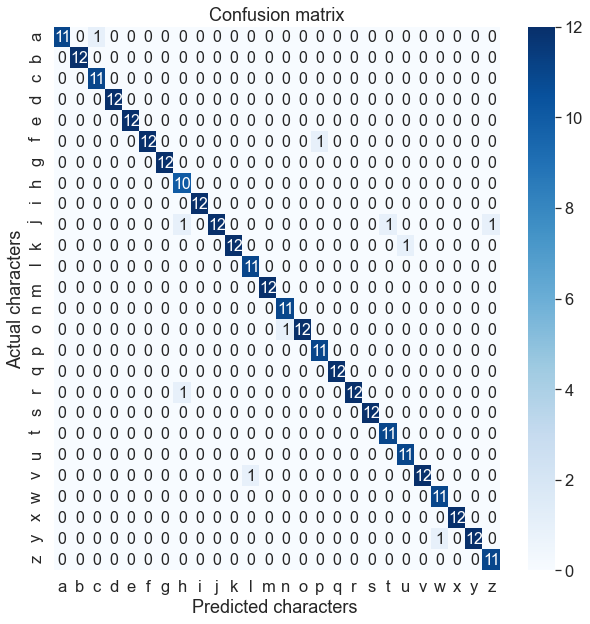

In [115]:
import seaborn as sn 
import pandas as pd
alphabets=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
df_cm = pd.DataFrame(y, index =alphabets,columns =alphabets)
sn.set(font_scale=1.5)
plt.figure(figsize=(10,10))
plt.title('Confusion matrix')
sn.heatmap(df_cm,cmap="Blues", annot=True,annot_kws={"size": 16})
plt.ylabel('Actual characters')
plt.xlabel('Predicted characters ')
plt.plot()
plt.savefig('image2')

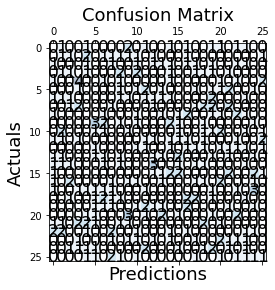

In [29]:
fig, ax = plt.subplots()
ax.matshow(y, cmap=plt.cm.Blues, alpha=0.3)
for i in range(y.shape[0]):
    for j in range(y.shape[1]):
        ax.text(x=j, y=i,s=y[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [105]:
imgs,labels = val_generator.next()
feats=model.predict(imgs)

In [106]:
feats=np.argmax(feats,axis=1)

In [109]:
feats

array([ 3, 22, 25, 13,  5,  1,  6, 10, 19, 25,  1, 23, 24,  3, 19, 18, 21,
       10, 20, 13, 19, 21, 25, 22, 17,  5,  9,  2,  8, 15, 20, 25, 16, 16,
        9, 11, 24,  3, 22, 19,  4,  7, 18, 12, 18,  1,  4,  4, 18, 21, 12,
       15, 18, 21, 12, 17,  3, 11,  0,  6, 13,  1, 17, 21, 18, 16, 18, 12,
        5, 14, 20, 23, 20,  0,  6, 10, 17, 17, 25, 11, 25,  2, 10,  3, 14,
        5,  9,  7, 16, 13,  9, 24, 14, 12,  4, 22, 14, 13,  2, 10, 20, 23,
       23, 20, 20, 22, 19,  0, 13,  8, 24, 24, 21, 10, 17,  7,  0, 13, 16,
       23,  5,  5,  1,  3,  0, 23,  9,  8,  9,  5,  9, 24, 25,  3,  5, 12,
        6, 15, 16,  7,  6,  6, 14,  0, 13,  9, 11, 10,  8, 15,  0, 13, 22,
        7, 25,  4, 19,  5,  0,  3, 23,  5, 24,  4, 11, 15,  5,  6,  1,  7,
       10,  8, 22, 24,  4,  2, 19,  8, 15, 12,  8, 25, 21,  7, 14,  6,  7,
       13,  4,  0, 16,  2, 18, 25, 15, 10, 16, 22,  0, 11,  8, 15,  9, 14,
       14, 10, 17,  2,  9, 10, 11, 18, 20, 24,  8, 22,  6, 21,  9, 12, 21,
       14, 18, 17, 19, 11

In [108]:
imgs.shape

(311, 28, 28, 3)

In [112]:

labels

array([ 3, 22, 25, 13,  5,  1,  6, 10, 19, 25,  1, 23, 24,  3, 19, 18, 21,
       10, 20, 13, 19, 21, 25, 22, 17,  5, 19,  2,  8, 15, 20, 25, 16, 16,
        9, 11, 24,  3, 22, 19,  4,  7, 18, 12, 18,  1,  4,  4, 18, 21, 12,
       15, 18, 21, 12, 17,  3, 11,  0,  6, 13,  1, 17, 21, 18, 16, 18, 12,
        5, 14, 20, 23, 20,  0,  6, 10, 17, 17, 25, 11, 25,  2, 10,  3, 14,
        5,  9,  7, 16, 13,  9, 24, 13, 12,  4, 22, 14, 13,  2, 10, 20, 23,
       23, 20, 20, 22, 19,  0, 13,  8, 24, 24, 21, 10, 17,  7,  0, 13, 16,
       23,  5,  5,  1,  3,  0, 23,  9,  8,  9,  5,  7, 24, 25,  3,  5, 12,
        6, 15, 16,  7,  6,  6, 14,  0, 13, 25, 11, 20,  8, 15,  0, 13, 22,
        7, 25,  4, 19,  5,  0,  3, 23,  5, 24,  4, 11, 15, 15,  6,  1,  7,
       10,  8, 22, 24,  4,  2, 19,  8, 15, 12,  8, 25, 21,  7, 14,  6,  7,
       13,  4,  0, 16,  2, 18, 25, 15, 10, 16, 22,  0, 11,  8, 15,  9, 14,
       14, 10, 17,  2,  9, 10, 11, 18, 20, 24,  8, 22,  6, 21,  9, 12, 11,
       14, 18,  7, 19, 11